In [1]:
import numpy as np
from HuffmanMatching.utils import GaussHermiteModulation, RandomWalkModulation, DiscretisedGaussianModulation
from shaping_analysis import generate_shaping_results, plot_distributions, plot_kl_vs_constellation_size, plot_single_distribution, plot_v_dist_constellation_size, plot_kl_vs_constellation_size_two_distributions, plot_v_dist_two_distributions
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def set_plot_style_one_column():
    cm_to_inch = 1 / 2.54
    fig_width = 16 * cm_to_inch  
    fig_height = 10 * cm_to_inch   

    plt.rcParams.update({
        'figure.figsize': (fig_width, fig_height),
        'font.size': 8,               # tamanho base da fonte
        'axes.labelsize': 9,          # rótulos dos eixos
        'axes.titlesize': 9,          # título
        'legend.fontsize': 8,         # legenda
        'xtick.labelsize': 8,
        'ytick.labelsize': 8
    })

set_plot_style_one_column()

In [3]:
# parameters
variance = 1
start = 4
stop = 32
step = 2

In [4]:
print(list(range(start, stop+1, step)))

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]


#### Gauss Hermite Distribution

In [5]:
gausshermite_results = generate_shaping_results(start, stop, step, variance, GaussHermiteModulation)

In [6]:
df = pd.DataFrame({
    "PAM-Symbols": gausshermite_results.object[1].dictionary.keys(),
    "Gauss-Hermite PMF": gausshermite_results.distribution[1],
    "Diadyc PMF": gausshermite_results.huffman_shaping[1],
    "Codewords": gausshermite_results.object[1].dictionary.values()
})

In [7]:
df['Gauss-Hermite PMF'] = df['Gauss-Hermite PMF'].round(4)
df['PAM-Symbols'] = df['PAM-Symbols'].round(4)

In [8]:
df

,PAM-Symbols,Gauss-Hermite PMF,Diadyc PMF,Codewords
0,-3.3243,0.0026,0.125,"[0, 0, 0]"
1,-1.8892,0.0886,0.125,"[0, 0, 1]"
2,-0.6167,0.4088,0.250,"[0, 1]"
3,0.6167,0.4088,0.250,"[1, 1]"
4,1.8892,0.0886,0.125,"[1, 0, 1]"
5,3.3243,0.0026,0.125,"[1, 0, 0]"


In [9]:
mean_valor = sum(gausshermite_results.kl_div_geometric_huffman)/len(gausshermite_results.kl_div_geometric_huffman)
max_valor = max(gausshermite_results.kl_div_geometric_huffman)
print(f"{mean_valor:.2f}, {max_valor:.2f}")

0.07, 0.14


In [10]:
mean_valor = sum(gausshermite_results.kl_div_huffman_shaping)/len(gausshermite_results.kl_div_huffman_shaping)
max_valor = max(gausshermite_results.kl_div_huffman_shaping)
print(f"{mean_valor:.2f}, {max_valor:.2f}")

0.57, 1.21


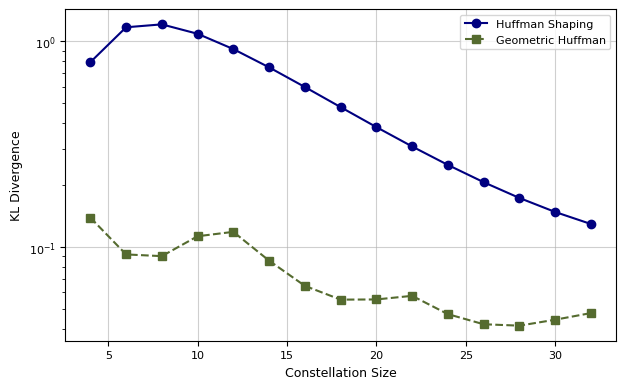

In [11]:
plot_kl_vs_constellation_size(gausshermite_results, f"Gauss-Hermite Distribution")

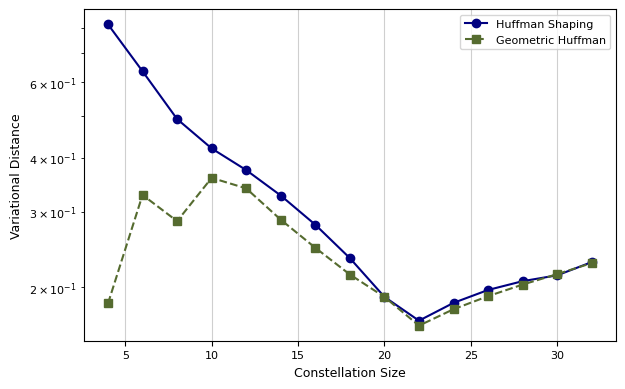

In [12]:
plot_v_dist_constellation_size(gausshermite_results, f"Gauss-Hermite Distribution")

In [13]:
mean_valor = sum(gausshermite_results.v_dist_geometric_huffman)/len(gausshermite_results.v_dist_geometric_huffman)
max_valor = max(gausshermite_results.v_dist_geometric_huffman)
print(f"{mean_valor:.2f}, {max_valor:.2f}")

0.24, 0.36


In [14]:
mean_valor = sum(gausshermite_results.v_dist_huffman_shaping)/len(gausshermite_results.v_dist_huffman_shaping)
max_valor = max(gausshermite_results.v_dist_huffman_shaping)
print(f"{mean_valor:.2f}, {max_valor:.2f}")

0.33, 0.82


In [15]:
#plot_distributions(gausshermite_results, "PAM (Gauss-Hermite)")

#### Binomial Distribution

In [16]:
binomial_results = generate_shaping_results(start, stop, step, variance, RandomWalkModulation)

In [17]:
mean_valor = sum(binomial_results.kl_div_geometric_huffman)/len(binomial_results.kl_div_geometric_huffman)
max_valor = max(binomial_results.kl_div_geometric_huffman)
print(f"{mean_valor:.2f}, {max_valor:.2f}")

0.05, 0.09


In [18]:
mean_valor = sum(binomial_results.kl_div_huffman_shaping)/len(binomial_results.kl_div_huffman_shaping)
max_valor = max(binomial_results.kl_div_huffman_shaping)
print(f"{mean_valor:.2f}, {max_valor:.2f}")

0.12, 0.26


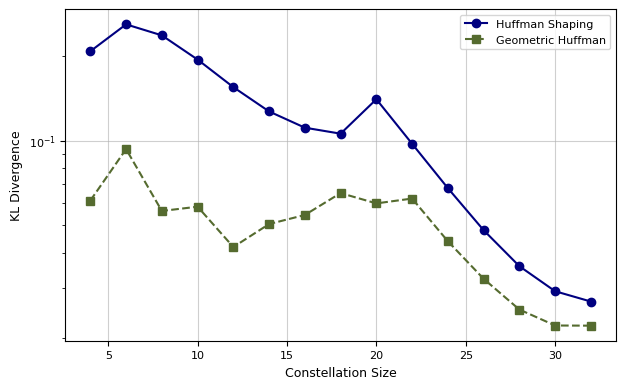

In [19]:
plot_kl_vs_constellation_size(binomial_results, f"Binomial Distribution")

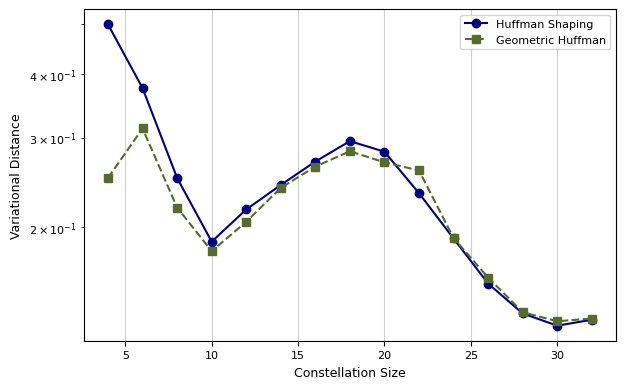

In [20]:
plot_v_dist_constellation_size(binomial_results, f"Binomial Distribution")

In [21]:
mean_valor = sum(binomial_results.v_dist_geometric_huffman)/len(binomial_results.v_dist_geometric_huffman)
max_valor = max(binomial_results.v_dist_geometric_huffman)
print(f"{mean_valor:.2f}, {max_valor:.2f}")

0.22, 0.31


In [22]:
mean_valor = sum(binomial_results.v_dist_huffman_shaping)/len(binomial_results.v_dist_huffman_shaping)
max_valor = max(binomial_results.v_dist_huffman_shaping)
print(f"{mean_valor:.2f}, {max_valor:.2f}")

0.24, 0.50


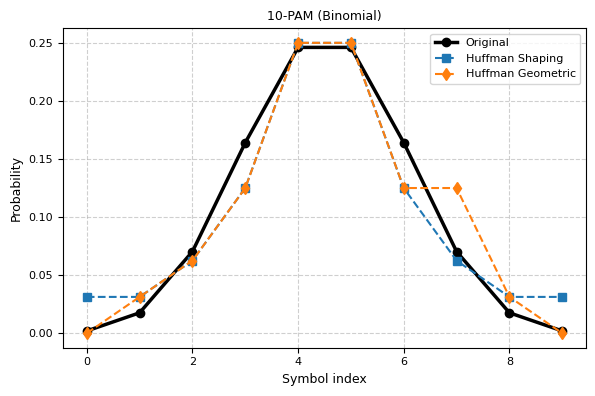

Huffman Distribution = [0.03125 0.03125 0.0625  0.125   0.25    0.25    0.125   0.0625  0.03125
 0.03125]
Huffman Geometric Distribution = [0.      0.03125 0.0625  0.125   0.25    0.25    0.125   0.125   0.03125
 0.     ]


In [23]:
idx = 3
plot_single_distribution(binomial_results, idx, f"PAM (Binomial)")
print(f"Huffman Distribution = {np.array(binomial_results.huffman_shaping[idx])}")
print(f"Huffman Geometric Distribution = {np.array(binomial_results.geometric_huffman[idx])}")

In [24]:
np.log2(1/np.array(binomial_results.geometric_huffman[3]))

/tmp/ipykernel_9841/1418942379.py:1: RuntimeWarning: divide by zero encountered in divide
  np.log2(1/np.array(binomial_results.geometric_huffman[3]))


array([inf,  5.,  4.,  3.,  2.,  2.,  3.,  3.,  5., inf])

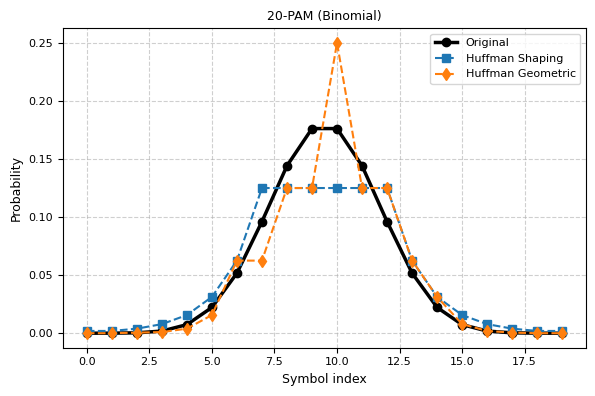

Huffman Distribution = [0.00195312 0.00195312 0.00390625 0.0078125  0.015625   0.03125
 0.0625     0.125      0.125      0.125      0.125      0.125
 0.125      0.0625     0.03125    0.015625   0.0078125  0.00390625
 0.00195312 0.00195312]
Huffman Geometric Distribution = [0, 0, 0.00048828125, 0.0009765625, 0.00390625, 0.015625, 0.0625, 0.0625, 0.125, 0.125, 0.25, 0.125, 0.125, 0.0625, 0.03125, 0.0078125, 0.001953125, 0.00048828125, 0, 0]


In [25]:
idx = 8
plot_single_distribution(binomial_results, idx, f"PAM (Binomial)")
print(f"Huffman Distribution = {binomial_results.huffman_shaping[idx]}")
print(f"Huffman Geometric Distribution = {binomial_results.geometric_huffman[idx]}")

In [26]:
#plot_distributions(binomial_results, "PAM (Binomial)")

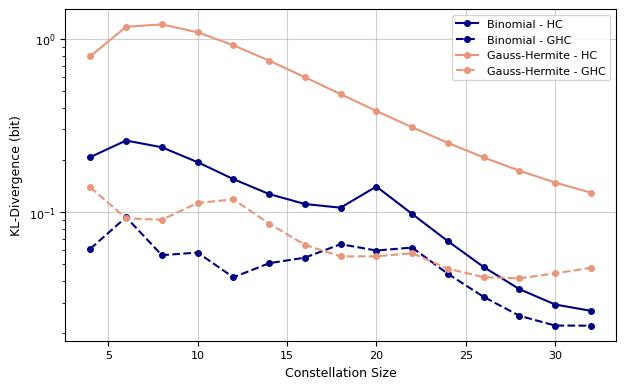

In [27]:
plot_kl_vs_constellation_size_two_distributions(binomial_results, gausshermite_results)

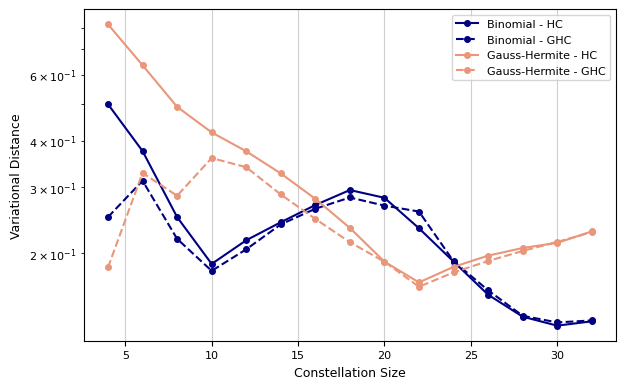

In [28]:
plot_v_dist_two_distributions(binomial_results, gausshermite_results)

#### Gaussian Distribution